# Clustering techniques and Visualization


In [3]:
from sklearn import datasets
data = datasets.load_iris()

In [13]:
import pandas as pd
d_X = pd.DataFrame(data['data'],columns=data['feature_names'])
d_y = pd.DataFrame(data['target'])

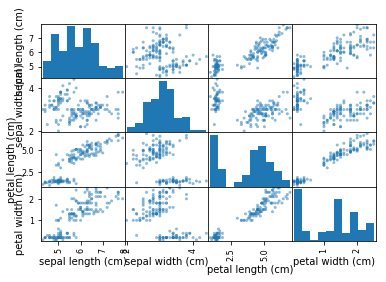

In [12]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
scatter_matrix(d_X)
plt.show()

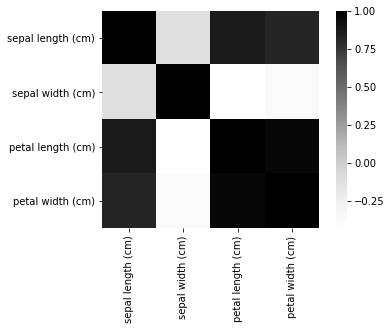

In [17]:
import seaborn as sns
corr_mat = d_X.corr()
sns.heatmap(corr_mat,vmax=1,square=True,cmap='Greys')
plt.show()

## The Elbow Method



In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(d_X)
y = d_y

In [32]:
from sklearn.cluster import MiniBatchKMeans
def train_model(X,n_clusters=5):
    km = MiniBatchKMeans(n_clusters=n_clusters)
    km.fit(X)
    return km
inertia = []
n_clusters = []
for i in range(1,30):
    model = train_model(X,i)
    inertia.append(model.inertia_)
    n_clusters.append(i)

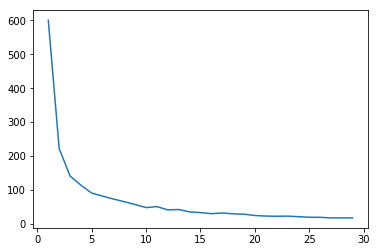

In [33]:
plt.plot(n_clusters,inertia)
plt.show()

## Visualization using PCA



## Clustering Evaluation